In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 결정 트리

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # random_state 를 설정해주지 않으면 매번 다른 모델이 생성될 수 있음
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

## 예측

결정 트리의 장점 중 하나는 데이터 전처리가 거의 필요 없다.

특히 특성 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요 없다.

**루트 노드(최상위 노드)**

**자식 노드(부모를 가지는 노드)**

**리프 노드 - 단말 노드(자식이 없는 노드)**

---

사이킷런은 이진 트리만 만드는 CART 알고리즘을 사용한다.

리프 노드 외 모든 노드는 자식 노드를 두개 가진다. (예 / 아니오)

ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만든다.

---

### 노드 속성 : samples, value

samples : 노드가 얼마나 많은 훈련 샘플에 해당되는가

value : 노드가 각 클래스의 얼마나 많은 훈련 샘플에 해당되는가

---

### 노드 속성  : gini

엔트로피와 더불어 불순도 측정 방법으로 많이 쓰이는

노드의 'gini' 속성은 '노드의 불순도 (impurity)'를 측정한 값이다.

한 노드에 해당된 모든 샘플이 같은 클래스에 속해 있다면 이 노드는 순수하다. **gini = 0**

G = 1 - ((value[0] / samples)^2 + (value[1] / samples)^2 + ... + (value[n] / samples)^2)

---

### 화이트박스 vs 블랙박스 모델

화이트박스 모델은 매우 직관적이고 간단하며 이해하기 쉬운 결정 방식을 사용하며 필요하다면 손으로 따라해 볼 수도 있음 **(대표적으로 결정 트리)**

블랙박스 모델은 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인이 가능하나 왜 그런 예측을 만드는지 쉽게 설명하기 어려움 **(대표적으로 신경망 NN)**

Saving figure decision_tree_decision_boundaries_plot


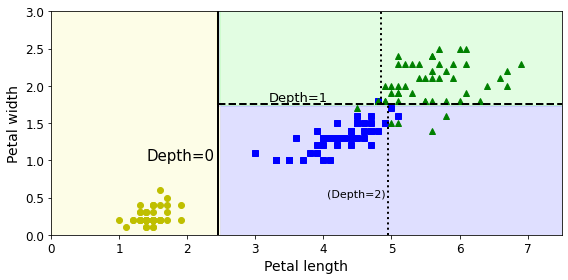

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Depth를 2로 설정했기 때문에 결정 트리는 Depth=1까지만 분할 됨

**순수 노드 (즉 노드의 Gini 속성이 0이 되면 더 이상 결정경계를 분할할 필요가 없음)**

## 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정하는 것이 가능하다.

1. 먼저 특저 샘플이 속하는 노드를 찾기 위해 트리를 탐색한다.

2. 찾은 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환한다.

But

결정 트리에서 결정경계에 의해 나누어진 사각형 안에서는 모든 샘플이 동등한 확률을 가진다.

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

### CART 훈련 알고리즘

사이킷런은 결정 트리 훈련을 위해 CART 알고리즘을 사용한다.

원리는 하나의 특성과 임계값을 이용해서 두 서브셋으로 분리하는 것이다.

? 어떤 특성과 임계값을 선택하는가

: 가장 순수한 서브셋들을 생성하는 특성과 임계값 짝을 검색한다. -- 비용함수 정의가 필요하다.


m(left/right) 왼쪽 오른쪽 서브셋의 샘플 수
G(left/right) 왼쪽 오른쪽 서브셋의 불순도 측정


### 훈련 알고리즘 종료 조건

1. 트리가 최대 깊이(max_depth)가 되면 중지

2. 불순도를 줄이는 분할을 찾을 수 없을 때 중지

3. 그 외 매개변수 설정 : min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes


### 계산 복잡도 -- 탐욕적 알고리즘

종종 납득할 만한 좋은 솔루션을 생성하지만 최적의 솔루션을 보장하지는 않는다.

최적 트리를 찾는 것은 어렵다.. ㅋㅋ

#### [ 결정 트리로 예측을 할 때 (일반적인 2진 트리로 가정) ]

- 루트 노드에서 리프 노드까지 탐색하는데 O(log(m)) 노드(깊이 d 만큼의 노드)를 거쳐야 함

- 깊이 d인 균형 이진 트리에서 리프 노드 개수는 2^d

- 만약 샘플 개수 m 만큼 리프 노드가 있다면 m = 2^d, d = log(m)

- 각 노드에서는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 O(log(m))이다.

- 즉, 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다.

#### [ 결정 트리로 훈련을 할 때 ]

- 각 노드에서 모든 훈련 샘플의 모든 특성 비교 (max_feature를 지정하면 제한할 수 있음)

- 훈련 복잡도는 O(n * mlog(m))이다 : 퀵정렬이 (mlog(m)) 복잡도를 가지고 특성 별 정렬을 함

- 훈련셋이 작을 경우 사이킷런은 (presort=True)로 훈련 속도를 높일 수 있음

### 지니 불순도 vs 엔트로피

- 둘이 실제 큰 차이는 없음 - 비슷한 결정 트리를 생성함

- 다만 지니 불순도가 조금 더 계산이 빠름 (따라서 기본값임)

- 지니 불순도는 가장 빈번한 클래스를 한쪽 가지로 고립시키는 경향이 있음

- 반면 엔트로피는 좀 더 균형 잡힌 트리를 생성함


### 사이킷런에서 불순도 측정 방법 설정

criterion 하이퍼파라미터 설정으로 변경 가능
- 기본값 : 지니 불순도 gini , 엔트로피 entropy

엔트로피
- ML에서 엔트로피는 불순도 측정방법으로 자주 사용됨
- 어떤 데이터셋이 한 클래스의 샘플만 담고 있으면 엔트로피가 0임


### 규제 하이퍼파라미터

결정 트리는 훈련 데이터에 대한 제약이 거의 없음

- 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 함 (대부분 오버피팅되기 쉬움)

- 이러한 모델을 비파라미터 모델이라 부름
- - 모델 파라미터가 전혀 없는 것이 아니라 보통 많음
- - 훈련되기 전에 파라미터 수가 결정되지 않기 때문
- - 따라서 모델 구조가 자유로이 데이터의 구조에 맞춰질 수 있음
- - 반대로 선형 모델과 같은 파라미터 모델은 미리 정의된 모델 파라미터 수를 가짐
- - - 자유도가 제한되고 오버피팅 위험은 줄어듦, 그러나 언더피팅 위험은 커짐

- 결정 트리의 자유도 제한 필요 (규제)
- - 자유도를 제한하지 않으면 오버피팅 되기 쉬움
- - 보통 결정 트리의 최대 깊이는 제어 가능
- - 기본 값은 제어가 없음을 의미하는 None
- - max_depth 하이퍼파라미터를 규제하면 오버피팅 위험이 감소


- 규제를 통해 결정 트리의 형태를 제한

min_samples_split : 분할 되기 위해 노드가 가져야할 최소 샘플 수

min_samples_leaf : 리프 노드가 가지고 있어야할 최소 샘플 수

min_weight_fraction_leaf : min_samples_leaf와 같으나 가중치가 부여된 전체 수에서의 비율

max_leaf_nodes : 리프 노드의 최대 수

max_features : 각 노드에서 분할에 사용할 특성의 최대 수

**min_ 으로 시작하는 매개변수를 증가, max_ 로 시작하는 매개변수를 감소하면 모델에 규제가 커짐!**

Saving figure min_samples_leaf_plot


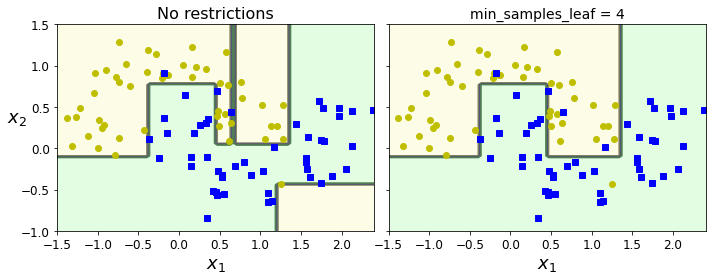

In [8]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

## 결정 트리 회귀

In [9]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 결정 트리 분류와 주요 차이

각 노드에서 클래스를 예측하는 대신 '어떤 값'을 예측

CART 알고리즘 비용함수에서 Gini 불순도 대신 MSE를 사용

#### 각 영역의 예측값 y_node은 항상 그 영역에 있는 타겟값들의 평균

#### 알고리즘은 예측값과 가능한 많은 샘플이 가까이 있도록 영역을 분할

Saving figure tree_regression_plot


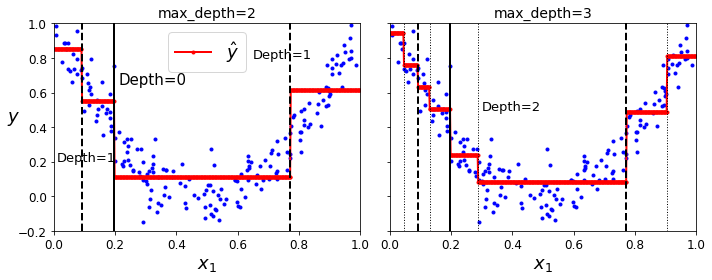

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

결정 트리 회귀의 CART 알고리즘은 훈련셋의 불순도를 최소화하는 방향으로 분할하는 대신,

MSE를 최소화하도록 분할하는 것을 제외하고는 분류와 거의 비슷하게 동작


#### 분류와 같이 회귀 작업에서도 결정 트리는 오버피팅되기 쉬움

### 결정 트리 불안정성

- 결정 트리는 계단 모양의 결정 경계 (모든 분할은 특성 축에 수직) 를 생성한다.

즉, 훈련셋의 회전에 민감함

이를 위해 데이터셋이 더 좋은 방향성을 가지도록 변환시켜주는 PCA(Principal Component Analysis)를 사용한다.


- 결정 트리는 훈련 데이터에 있는 작은 변화에도 매우 민감하게 반응함